In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [82]:
dat = pd.read_csv('../chidata/dat_model.csv')
del dat['LICENSE_DESCRIPTION']
del dat['Unnamed: 0']

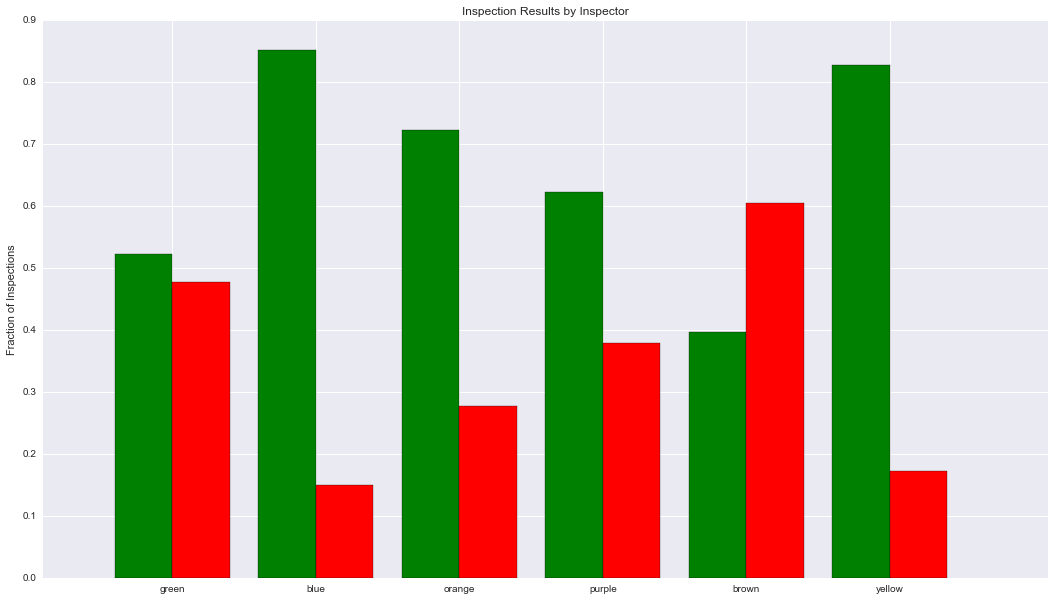

In [179]:
inspector = dat.groupby('Inspector_Assigned')

insp_sum = inspector.sum()
insp_count  = inspector.count()

inspector_pass = (insp_sum['pass_flag'] / insp_count['pass_flag']).values
inspector_fail = ((insp_count['pass_flag'] - insp_sum['pass_flag']) / insp_count['pass_flag']).values

names = dat['Inspector_Assigned'].dropna().unique()

N = len(names)
ind = np.arange(N)  # the x locations for the groups
width = 0.4   # the width of the bars

fig, ax = plt.subplots(figsize=(18, 10))
rects1 = ax.bar(0.5 + ind, inspector_pass, width, color='g')
rects2 = ax.bar(0.5 + ind + width, inspector_fail, width, color='r')

ax.set_ylabel('Fraction of Inspections')
ax.set_title('Inspection Results by Inspector')
ax.set_xticks(0.5 + ind + width)
ax.set_xticklabels(names)

plt.show()



In [74]:
businesses = pd.read_csv('../chidata/bus_license.csv')

/Library/Python/2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [121]:
businesses.columns

Index([u'Unnamed: 0', u'ID', u'LICENSE_ID', u'ACCOUNT_NUMBER', u'SITE_NUMBER',
       u'LEGAL_NAME', u'DOING_BUSINESS_AS_NAME', u'ADDRESS', u'CITY', u'STATE',
       u'ZIP_CODE', u'WARD', u'PRECINCT', u'POLICE_DISTRICT', u'LICENSE_CODE',
       u'LICENSE_DESCRIPTION', u'LICENSE_NUMBER', u'APPLICATION_TYPE',
       u'APPLICATION_CREATED_DATE', u'APPLICATION_REQUIREMENTS_COMPLETE',
       u'PAYMENT_DATE', u'CONDITIONAL_APPROVAL', u'LICENSE_TERM_START_DATE',
       u'LICENSE_TERM_EXPIRATION_DATE', u'LICENSE_APPROVED_FOR_ISSUANCE',
       u'DATE_ISSUED', u'LICENSE_STATUS', u'LICENSE_STATUS_CHANGE_DATE',
       u'SSA', u'LATITUDE', u'LONGITUDE', u'LOCATION'],
      dtype='object')

In [83]:
inspects_with_bus_info = dat.join(businesses, how='left')

In [132]:
insps = pd.merge(dat, businesses, left_on='License', right_on='LICENSE_NUMBER', how='inner')
insps.shape

(104660, 69)

In [91]:
pass_insp = inspects_with_bus_info[inspects_with_bus_info['pass_flag'] == 1]
fail_insp = inspects_with_bus_info[inspects_with_bus_info['pass_flag'] == 0]

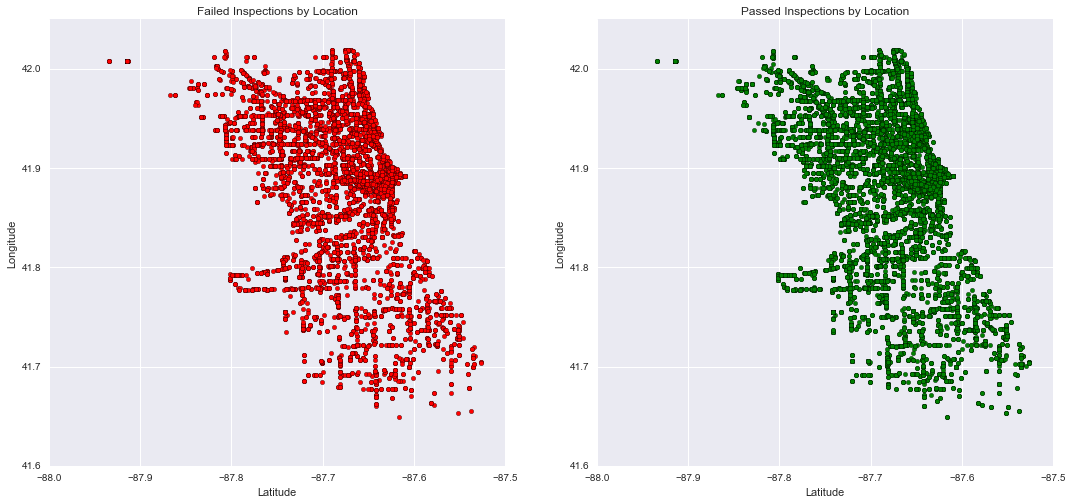

In [104]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(18, 8))

ax[0].scatter(fail_insp['LONGITUDE'], fail_insp['LATITUDE'], c='r')
ax[0].set_xlabel("Latitude")
ax[0].set_ylabel("Longitude")
ax[0].set_title("Failed Inspections by Location")
ax[1].scatter(pass_insp['LONGITUDE'], pass_insp['LATITUDE'], c='g')
ax[1].set_xlabel("Latitude")
ax[1].set_ylabel("Longitude")
ax[1].set_title("Passed Inspections by Location")

plt.show()

In [ ]:
plt.figure()
plt.scatter()

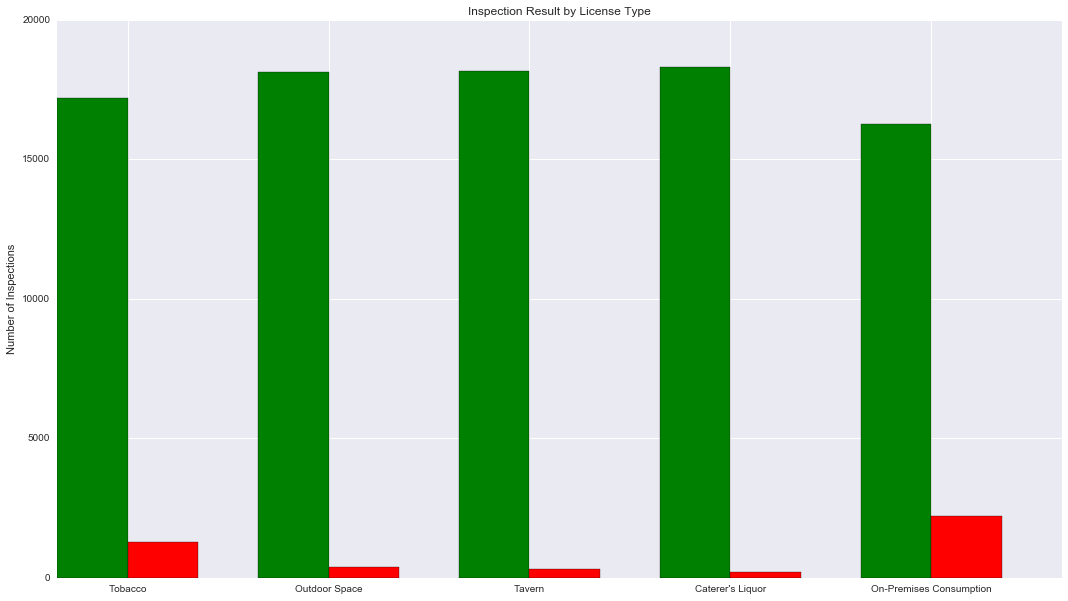

In [71]:
tobacco = dat.groupby('tobacco_retail_over_counter')
outdoor = dat.groupby('outdoor_patio')
tavern = dat.groupby('tavern')
caterer_liquor = dat.groupby('caterers_liquor_license')
consumption_on_prem = dat.groupby('consumption_on_premises_incidental_activity')

groups = [tobacco, outdoor, tavern, caterer_liquor, consumption_on_prem]
names = ["Tobacco", "Outdoor Space", "Tavern", "Caterer's Liquor", "On-Premises Consumption"]

pairs = [g.sum()['pass_flag'] for g in groups]

passes = [p[0] for p in pairs]
fails = [p[1] for p in pairs]

N = len(groups)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(18, 10))
rects1 = ax.bar(ind, passes, width, color='g')
rects2 = ax.bar(ind + width, fails, width, color='r')

ax.set_ylabel('Number of Inspections')
ax.set_title('Inspection Result by License Type')
ax.set_xticks(ind + width)
ax.set_xticklabels(names)

plt.show()


In [ ]:
plt.figure()

N = 
menMeans = (20, 35, 30, 35, 27)
menStd = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, menMeans, width, color='r', yerr=menStd)

womenMeans = (25, 32, 34, 20, 25)
womenStd = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, womenMeans, width, color='y', yerr=womenStd)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

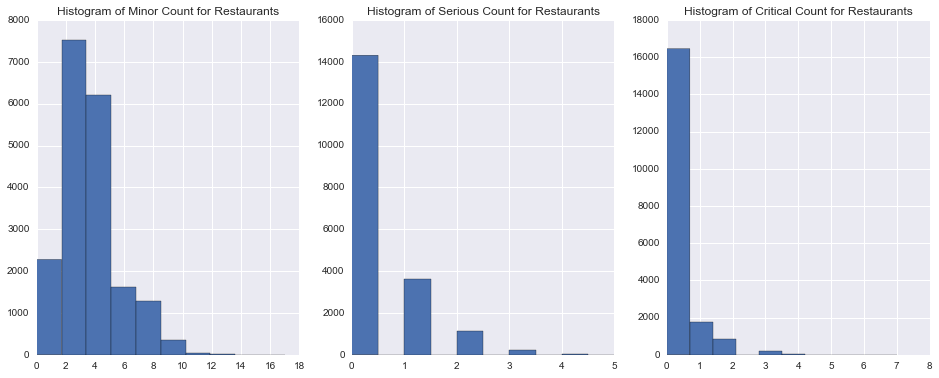

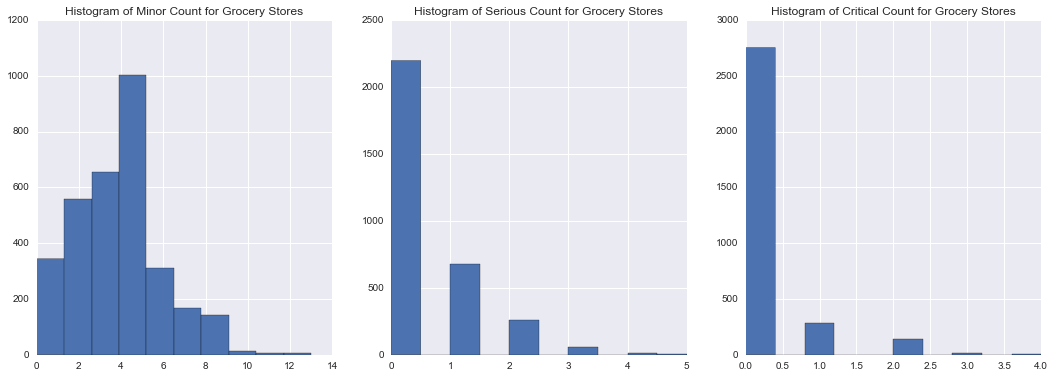

In [134]:
restaurants = dat[dat['Facility_Type'].str.contains('Restaurant')]

cri = restaurants['criticalCount']
ser = restaurants['seriousCount']
minor = restaurants['minorCount']

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(16,6))
axes[0].set_title("Histogram of Minor Count for Restaurants")
axes[0].hist(minor)
axes[1].set_title("Histogram of Serious Count for Restaurants")
axes[1].hist(ser)
axes[2].set_title("Histogram of Critical Count for Restaurants")
axes[2].hist(cri)
plt.show()

groc = dat[dat['Facility_Type'].str.contains('Grocery_Store')]

minor = groc['minorCount']
ser = groc['seriousCount']
cri = groc['criticalCount']

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(18,6))
axes[0].set_title("Histogram of Minor Count for Grocery Stores")
axes[0].hist(minor)
axes[1].set_title("Histogram of Serious Count for Grocery Stores")
axes[1].hist(ser)
axes[2].set_title("Histogram of Critical Count for Grocery Stores")
axes[2].hist(cri)
plt.show()

In [196]:
weather = pd.read_csv("../data/weather.csv")